## Linear Regression :  Geely Auto

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [2]:
car = pd.read_csv("/home/raji/Desktop/ml_andrewng/Datamining/IIIT_material/statistics/IIIT_assignment3/CarPrice_Assignment.csv")

In [3]:
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
car.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [5]:
car.shape

(205, 26)

### EDA

In [6]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [7]:
#No missing values

In [8]:
#Car_ID is not needed for anlaysis
car.drop('car_ID',axis=1,inplace=True)

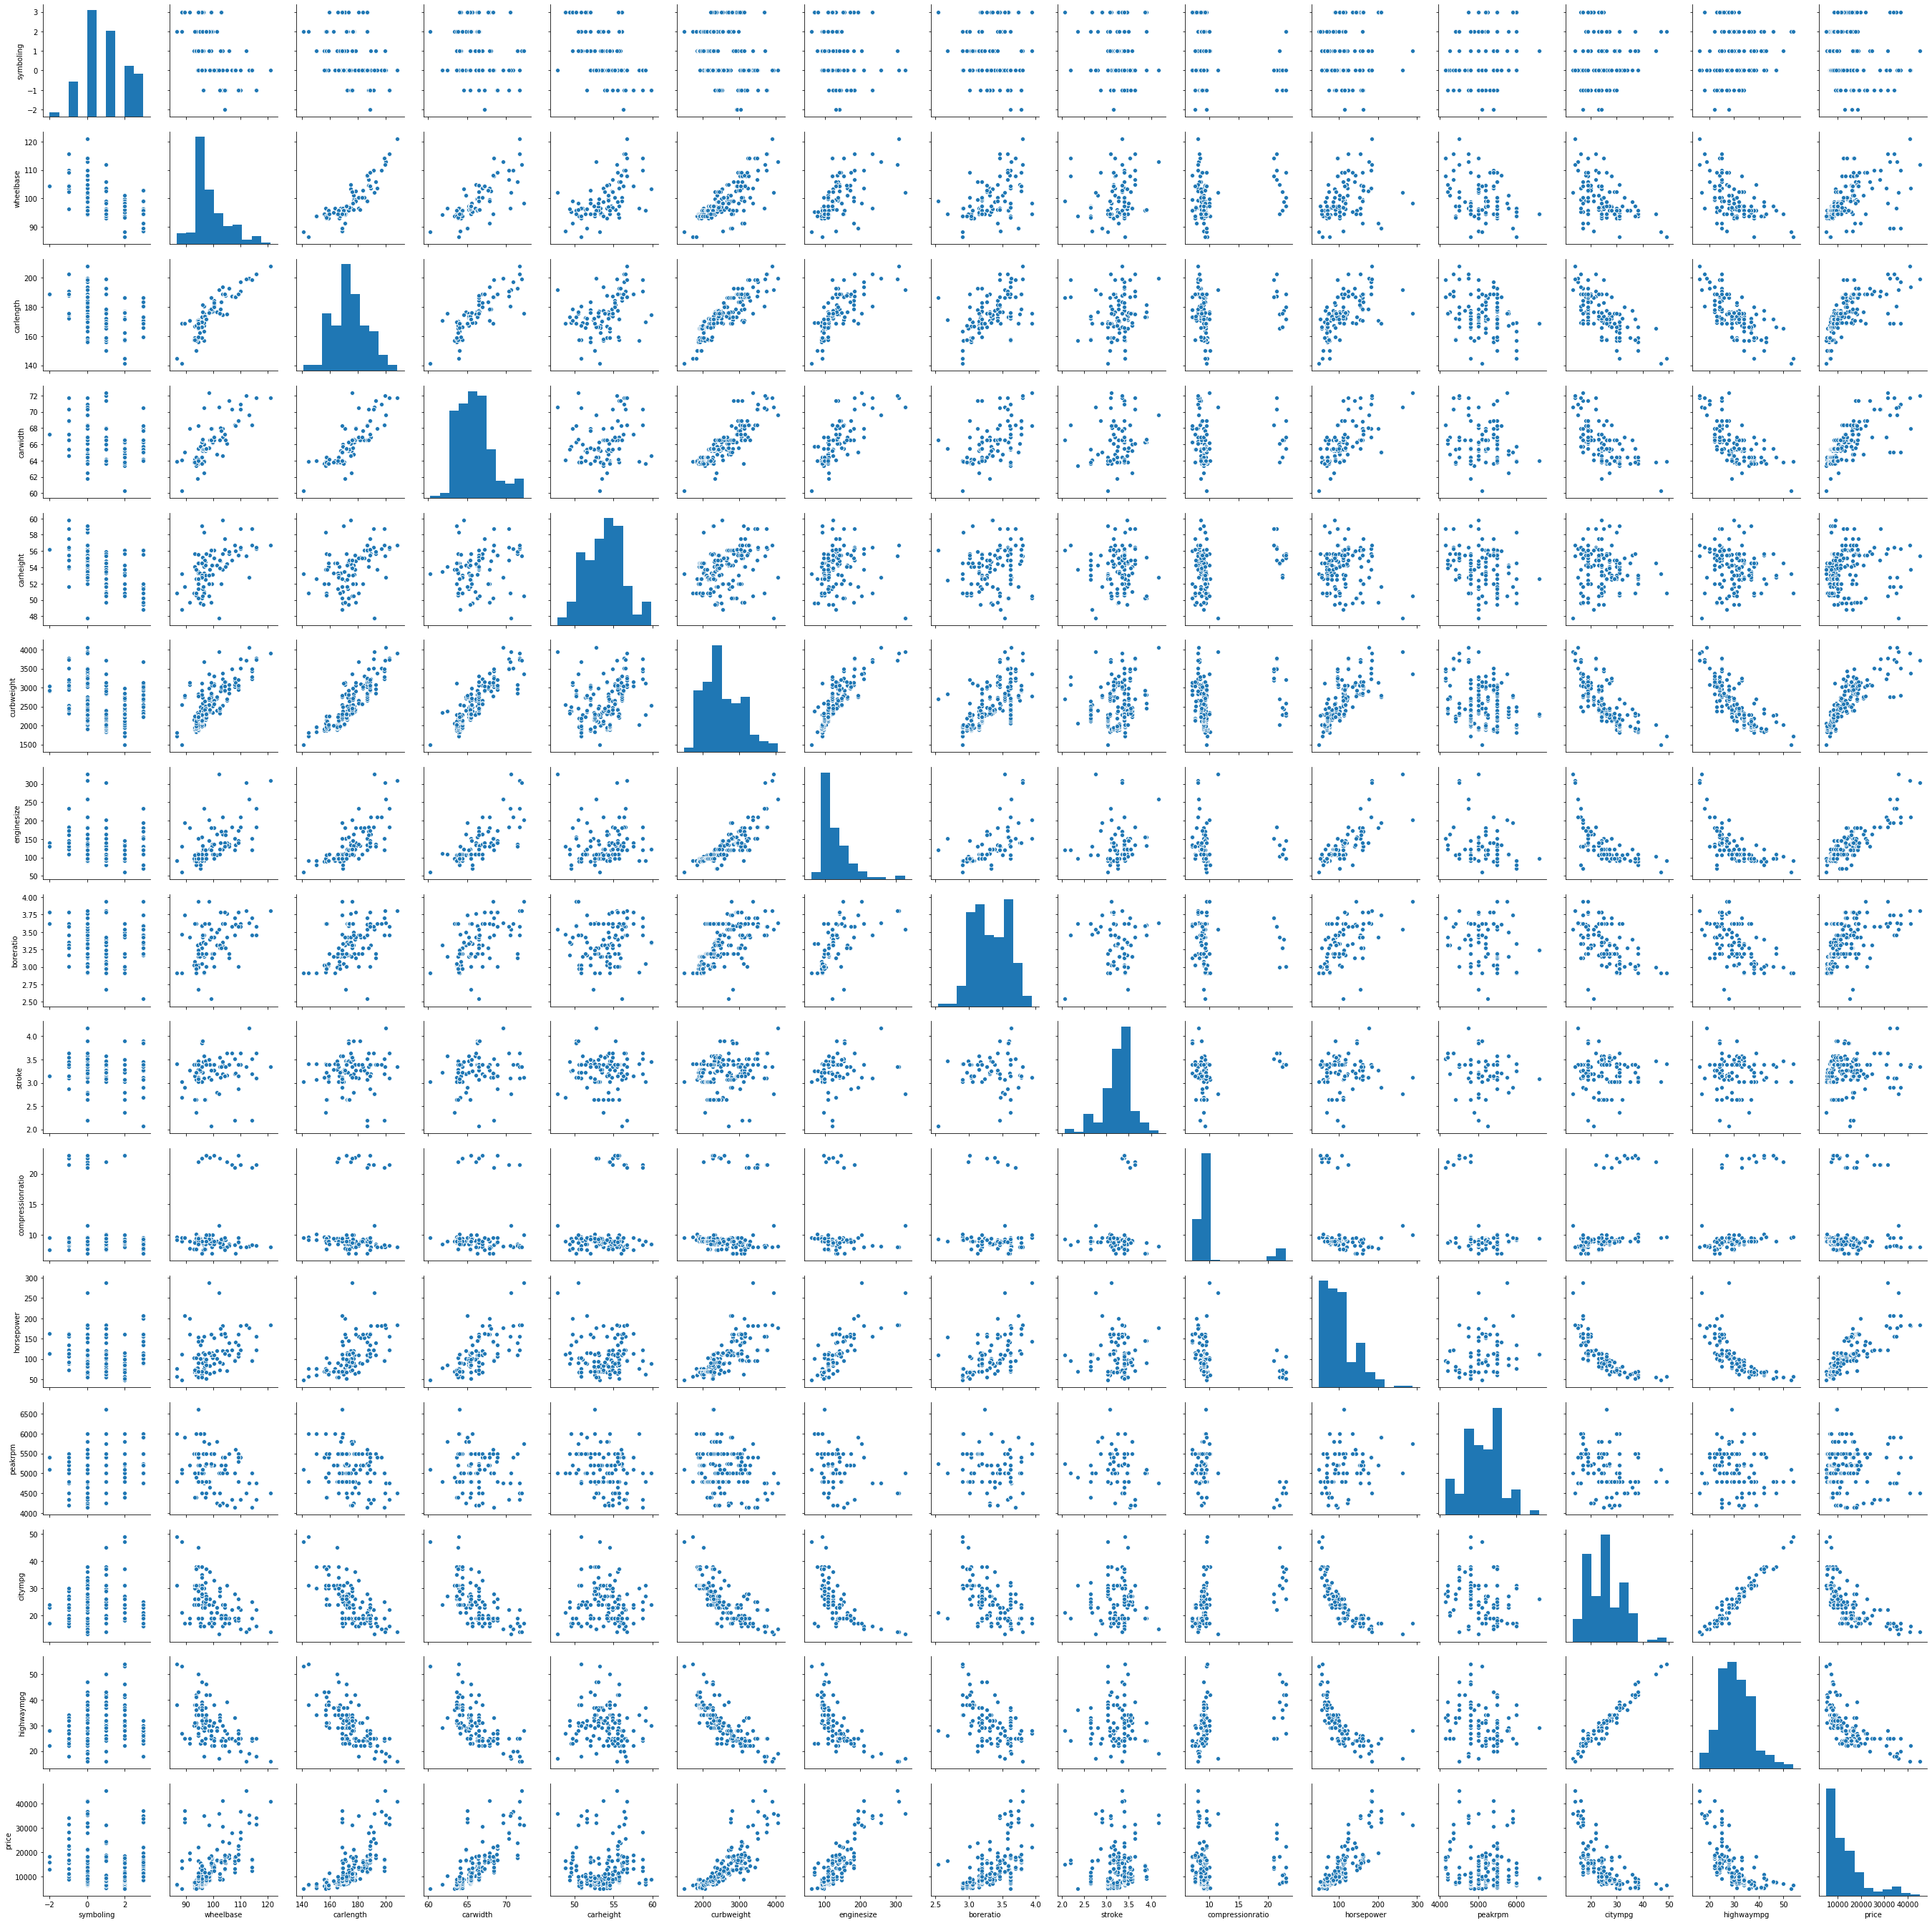

In [9]:
#Visualise the data for numeric values using pair plot
sns.pairplot(car)
plt.show()

In [10]:
# Get only the car names

In [11]:
car['carCompany'] = car['CarName'].apply(lambda x: x.split( )[0])
car.drop('CarName',axis=1,inplace=True)

In [12]:
car['carCompany']
car['carCompany'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [13]:
#replace missing spelt car names:
car['carCompany'].replace('maxda','mazda',inplace=True)
car['carCompany'].replace('Nissan','nissan',inplace=True)
car['carCompany'].replace('porcshce','porsche',inplace=True)
car['carCompany'].replace('toyouta','toyota',inplace=True)
car['carCompany'].replace(['vokswagen','vw'],'volkswagen',inplace=True)

In [14]:
car['carCompany'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

<function matplotlib.pyplot.show(*args, **kw)>

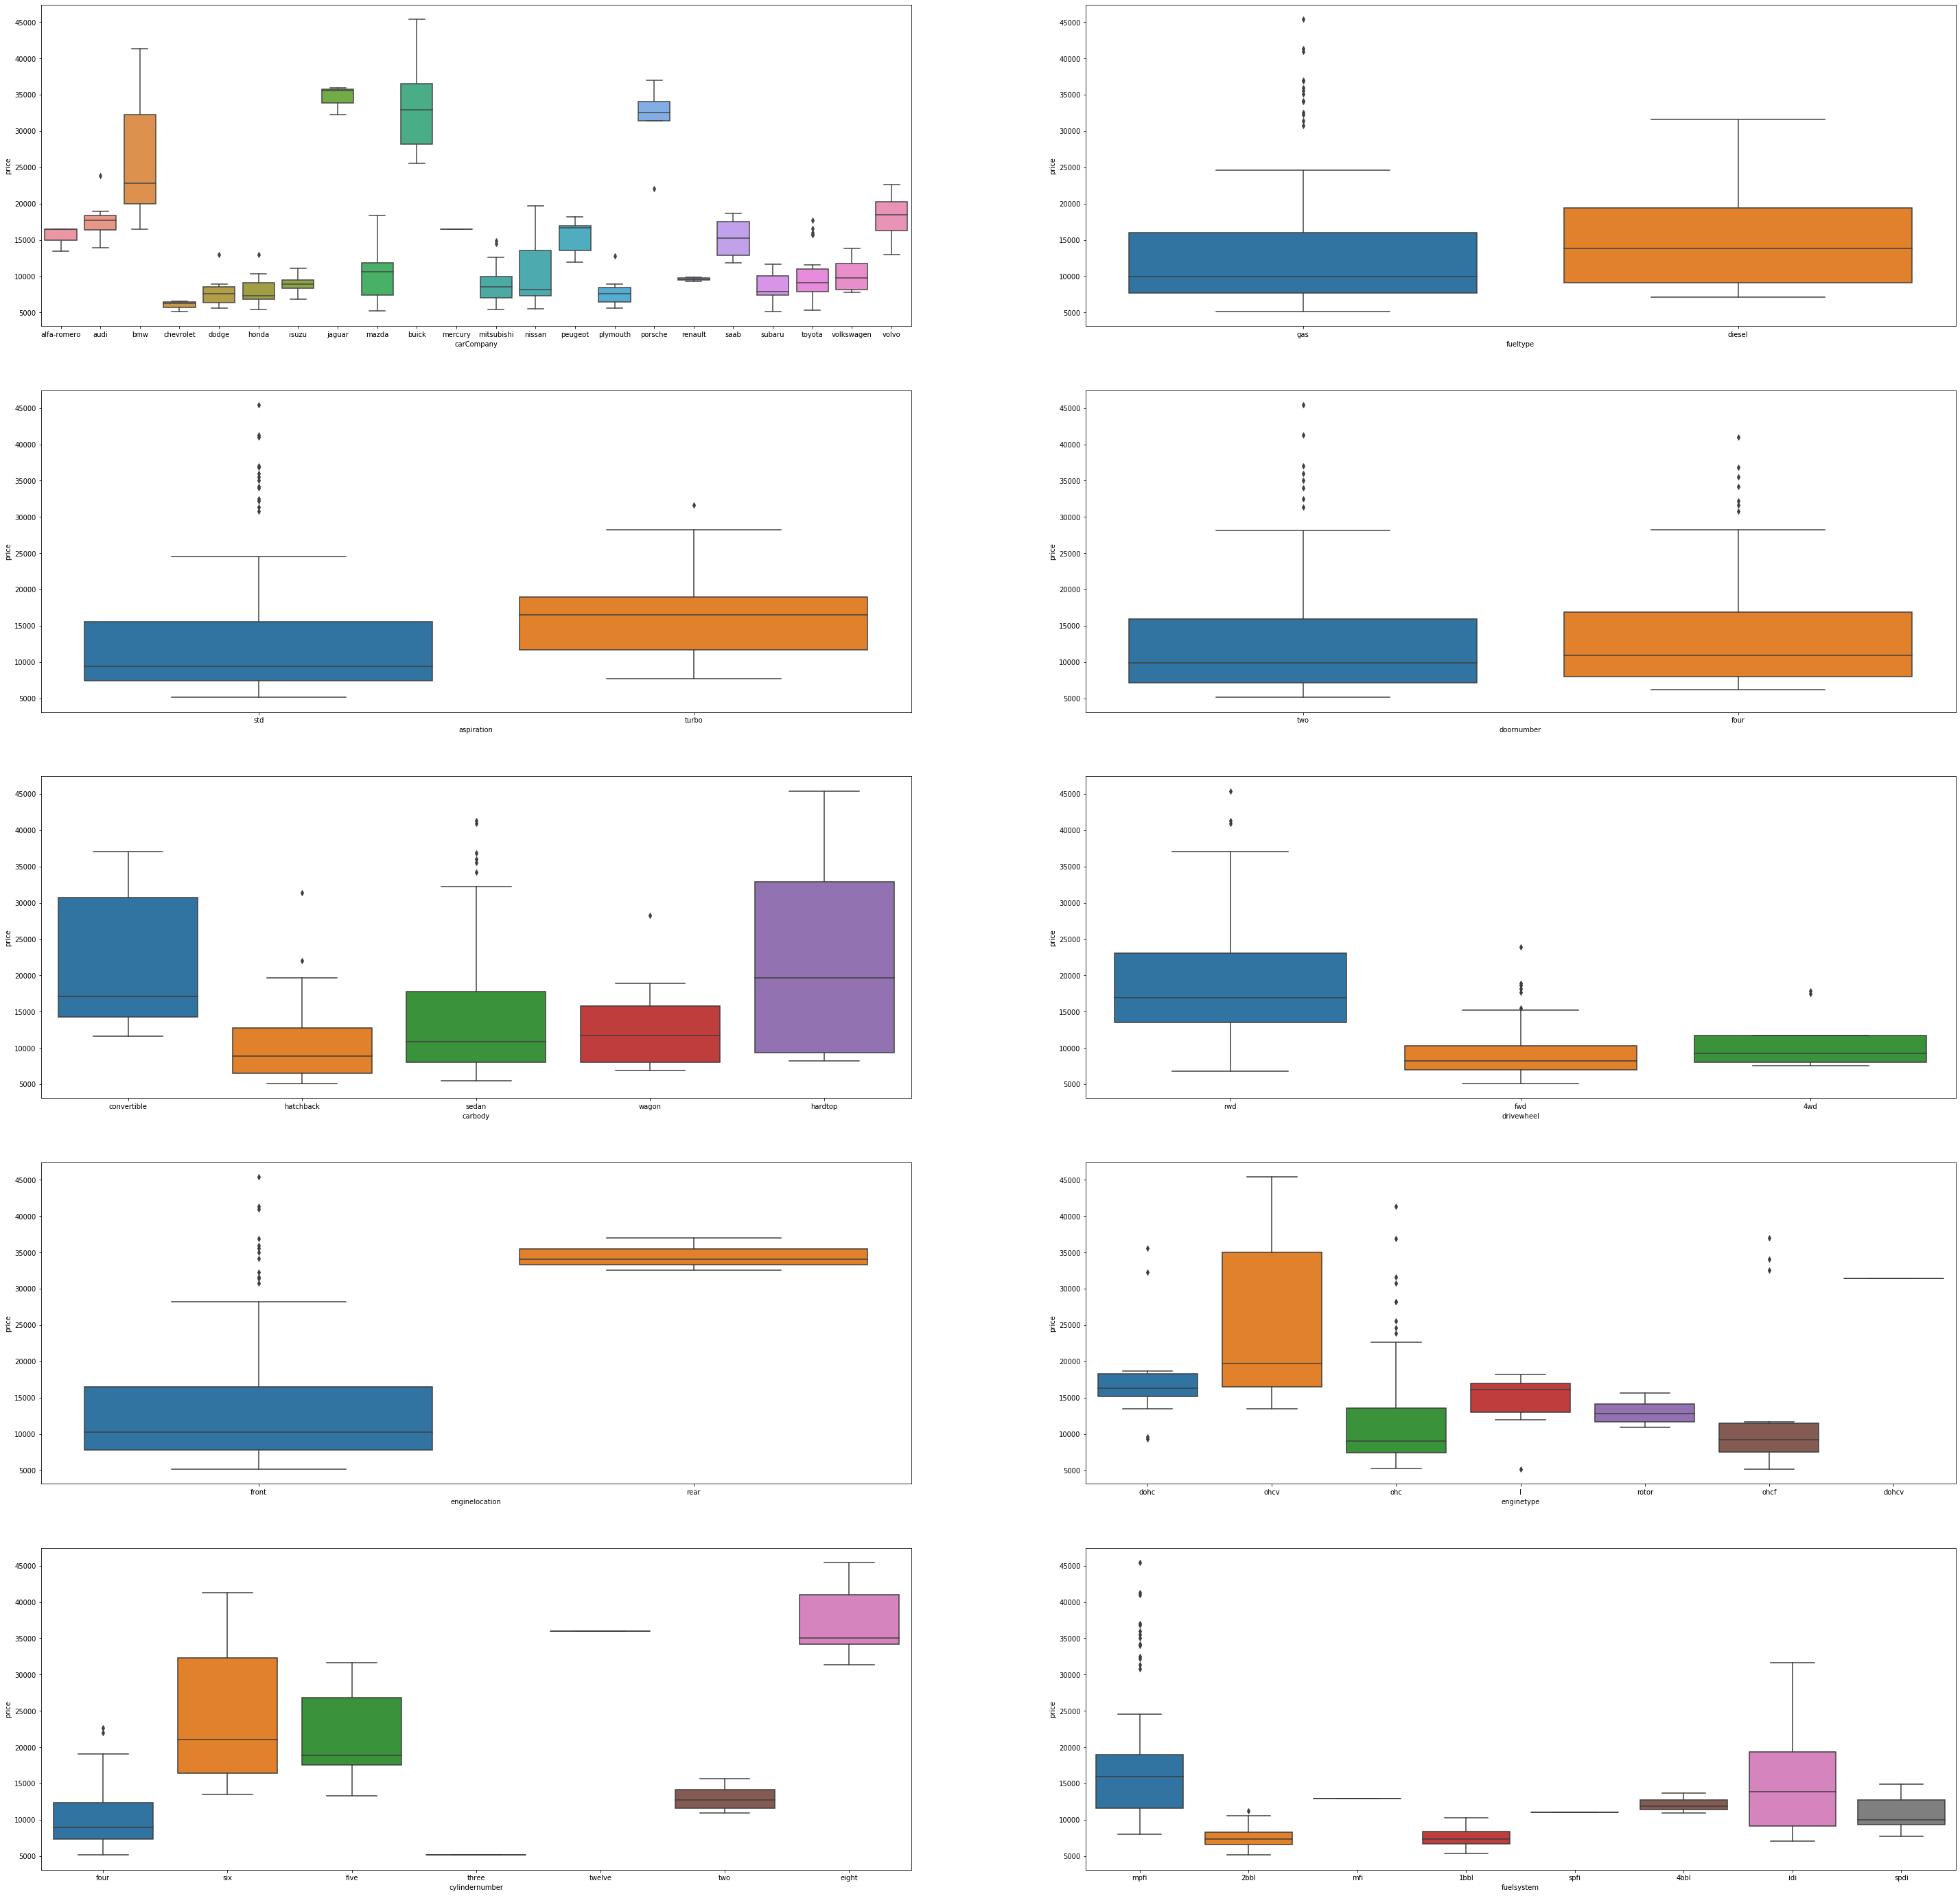

In [15]:
# Visualise the categorical data
plt.figure(figsize=(50,50))
plt.subplot(5,2,1)
sns.boxplot(x='carCompany',y='price',data=car)
plt.subplot(5,2,2)
sns.boxplot(x='fueltype',y='price',data=car)
plt.subplot(5,2,3)
sns.boxplot(x='aspiration',y='price',data=car)
plt.subplot(5,2,4)
sns.boxplot(x='doornumber',y='price',data=car)
plt.subplot(5,2,5)
sns.boxplot(x='carbody',y='price',data=car)
plt.subplot(5,2,6)
sns.boxplot(x='drivewheel',y='price',data=car)
plt.subplot(5,2,7)
sns.boxplot(x='enginelocation',y='price',data=car)
plt.subplot(5,2,8)
sns.boxplot(x='enginetype',y='price',data=car)
plt.subplot(5,2,9)
sns.boxplot(x='cylindernumber',y='price',data=car)
plt.subplot(5,2,10)
sns.boxplot(x='fuelsystem',y='price',data=car)

plt.show

##  Data Preparation: 
##  1 Encoding categorical variables:
### First we will handle variables with two categories:
### Variables with two categories are:
### 1)fueltype 2)aspiration 3)doornumber 4)enginelocation 


In [16]:
#how tp check two category variables
car.fueltype.value_counts()


gas       185
diesel     20
Name: fueltype, dtype: int64

In [17]:
car.aspiration.value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [18]:
car.doornumber.value_counts()

four    115
two      90
Name: doornumber, dtype: int64

In [19]:
car.enginelocation.value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

In [20]:
car['fueltype'] = car['fueltype'].map({'gas': 1, 'diesel': 0})
car['aspiration'] = car['aspiration'].map({'std': 1, 'turbo': 0})
car['doornumber'] = car['doornumber'].map({'two': 1, 'four': 0})
car['enginelocation'] = car['enginelocation'].map({'front': 1, 'rear': 0})
car['symboling'] = car['symboling'].map({-2: 'safe',-1: 'safe',0: 'moderate',1: 'moderate',2: 'risky',3:'risky'})
car.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carCompany
0,risky,1,1,1,convertible,rwd,1,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,risky,1,1,1,convertible,rwd,1,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,moderate,1,1,1,hatchback,rwd,1,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,risky,1,1,0,sedan,fwd,1,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,risky,1,1,0,sedan,4wd,1,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


## Creating dummy variables for more than two category variables:
carbody,drivewheel,enginetype,cylindernumber,fuelsystem


In [21]:
car.carbody.value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

In [22]:
carbody_status = pd.get_dummies(car['carbody'],drop_first=True)
carbody_status.head()

,hardtop,hatchback,sedan,wagon
0,0,0,0,0
1,0,0,0,0
2,0,1,0,0
3,0,0,1,0
4,0,0,1,0


In [23]:
carCompany_status = pd.get_dummies(car['carCompany'],drop_first=True)
carCompany_status.head()

,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
car.drivewheel.value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

In [25]:
drivewheel_status = pd.get_dummies(car['drivewheel'],drop_first=True)
drivewheel_status.head()

,fwd,rwd
0,0,1
1,0,1
2,0,1
3,1,0
4,0,0


In [26]:
car.enginetype.value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

In [27]:
enginetype_status = pd.get_dummies(car['enginetype'],drop_first=True)
enginetype_status.head()

,dohcv,l,ohc,ohcf,ohcv,rotor
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,1,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0


In [28]:
car.cylindernumber.value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64

In [29]:
cylindernumber_status = pd.get_dummies(car['cylindernumber'],drop_first=True)
cylindernumber_status.head()

,five,four,six,three,twelve,two
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,0,1,0,0,0
3,0,1,0,0,0,0
4,1,0,0,0,0,0


In [30]:
car.fuelsystem.value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64

In [31]:
fuelsystem_status = pd.get_dummies(car['fuelsystem'],drop_first=True)
fuelsystem_status.head()

,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0


In [32]:
symboling_status = pd.get_dummies(car['symboling'],drop_first=True)
symboling_status.head()

,risky,safe
0,1,0
1,1,0
2,0,0
3,1,0
4,1,0


In [33]:
#Concat the dummy df with original df
car = pd.concat([car,carCompany_status],axis=1)
car = pd.concat([car,carbody_status],axis=1)
car = pd.concat([car,drivewheel_status],axis=1)
car = pd.concat([car,enginetype_status],axis=1)
car = pd.concat([car,cylindernumber_status],axis=1)
car = pd.concat([car,fuelsystem_status],axis=1)
car = pd.concat([car,symboling_status],axis=1)


car.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,risky,safe
0,risky,1,1,1,convertible,rwd,1,88.6,168.8,64.1,...,0,0,0,0,0,1,0,0,1,0
1,risky,1,1,1,convertible,rwd,1,88.6,168.8,64.1,...,0,0,0,0,0,1,0,0,1,0
2,moderate,1,1,1,hatchback,rwd,1,94.5,171.2,65.5,...,0,0,0,0,0,1,0,0,0,0
3,risky,1,1,0,sedan,fwd,1,99.8,176.6,66.2,...,0,0,0,0,0,1,0,0,1,0
4,risky,1,1,0,sedan,4wd,1,99.4,176.6,66.4,...,0,0,0,0,0,1,0,0,1,0


In [34]:
car = car.drop('carbody',axis=1)
car = car.drop('drivewheel',axis=1)
car = car.drop('enginetype',axis=1)
car = car.drop('cylindernumber',axis=1)
car = car.drop('fuelsystem',axis=1)
car = car.drop('symboling',axis=1)
car = car.drop('carCompany',axis=1)

In [35]:
car.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,...,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,risky,safe
0,1,1,1,1,88.6,168.8,64.1,48.8,2548,130,...,0,0,0,0,0,1,0,0,1,0
1,1,1,1,1,88.6,168.8,64.1,48.8,2548,130,...,0,0,0,0,0,1,0,0,1,0
2,1,1,1,1,94.5,171.2,65.5,52.4,2823,152,...,0,0,0,0,0,1,0,0,0,0
3,1,1,0,1,99.8,176.6,66.2,54.3,2337,109,...,0,0,0,0,0,1,0,0,1,0
4,1,1,0,1,99.4,176.6,66.4,54.3,2824,136,...,0,0,0,0,0,1,0,0,1,0


## Splitting the Data into Training and Testing Sets

In [36]:
df_train,df_test = train_test_split(car,train_size=0.7,random_state=100)
print(df_train.shape)
print(df_test.shape)

(143, 66)
(62, 66)


### Rescaling the Features
#### using MinMaxScaler

In [37]:
#Apply minmax scalrer to umeric variables except dummy variables and category variables
scaler = MinMaxScaler()
num_vars = ['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']
df_train[num_vars]= scaler.fit_transform(df_train[num_vars])
df_train.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,...,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,risky,safe
122,1,1,0,1,0.244828,0.426016,0.291667,0.265487,0.272692,0.139623,...,0,1,0,0,0,0,0,0,0,0
125,1,1,1,1,0.272414,0.452033,0.666667,0.212389,0.500388,0.339623,...,0,0,0,0,0,1,0,0,1,0
166,1,1,1,1,0.272414,0.448780,0.308333,0.424779,0.314973,0.139623,...,0,0,0,0,0,1,0,0,0,0
1,1,1,1,1,0.068966,0.450407,0.316667,0.088496,0.411171,0.260377,...,0,0,0,0,0,1,0,0,1,0
199,1,0,0,1,0.610345,0.775610,0.575000,0.858407,0.647401,0.260377,...,0,0,0,0,0,1,0,0,0,1


In [38]:
df_train.describe()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,...,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,risky,safe
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.0,143.000000,143.000000
mean,0.909091,0.818182,0.440559,0.993007,0.411141,0.525476,0.461655,0.509004,0.407878,0.241351,...,0.027972,0.349650,0.020979,0.090909,0.0,0.440559,0.041958,0.0,0.244755,0.104895
std,0.288490,0.387050,0.498199,0.083624,0.205581,0.204848,0.184517,0.215378,0.211269,0.154619,...,0.165472,0.478536,0.143818,0.288490,0.0,0.498199,0.201198,0.0,0.431453,0.307495
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
25%,1.000000,1.000000,0.000000,1.000000,0.272414,0.399187,0.304167,0.353982,0.245539,0.135849,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,0.341379,0.502439,0.425000,0.522124,0.355702,0.184906,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,0.503448,0.669919,0.550000,0.668142,0.559542,0.301887,...,0.000000,1.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.0,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0,1.000000,1.000000


## Build the model

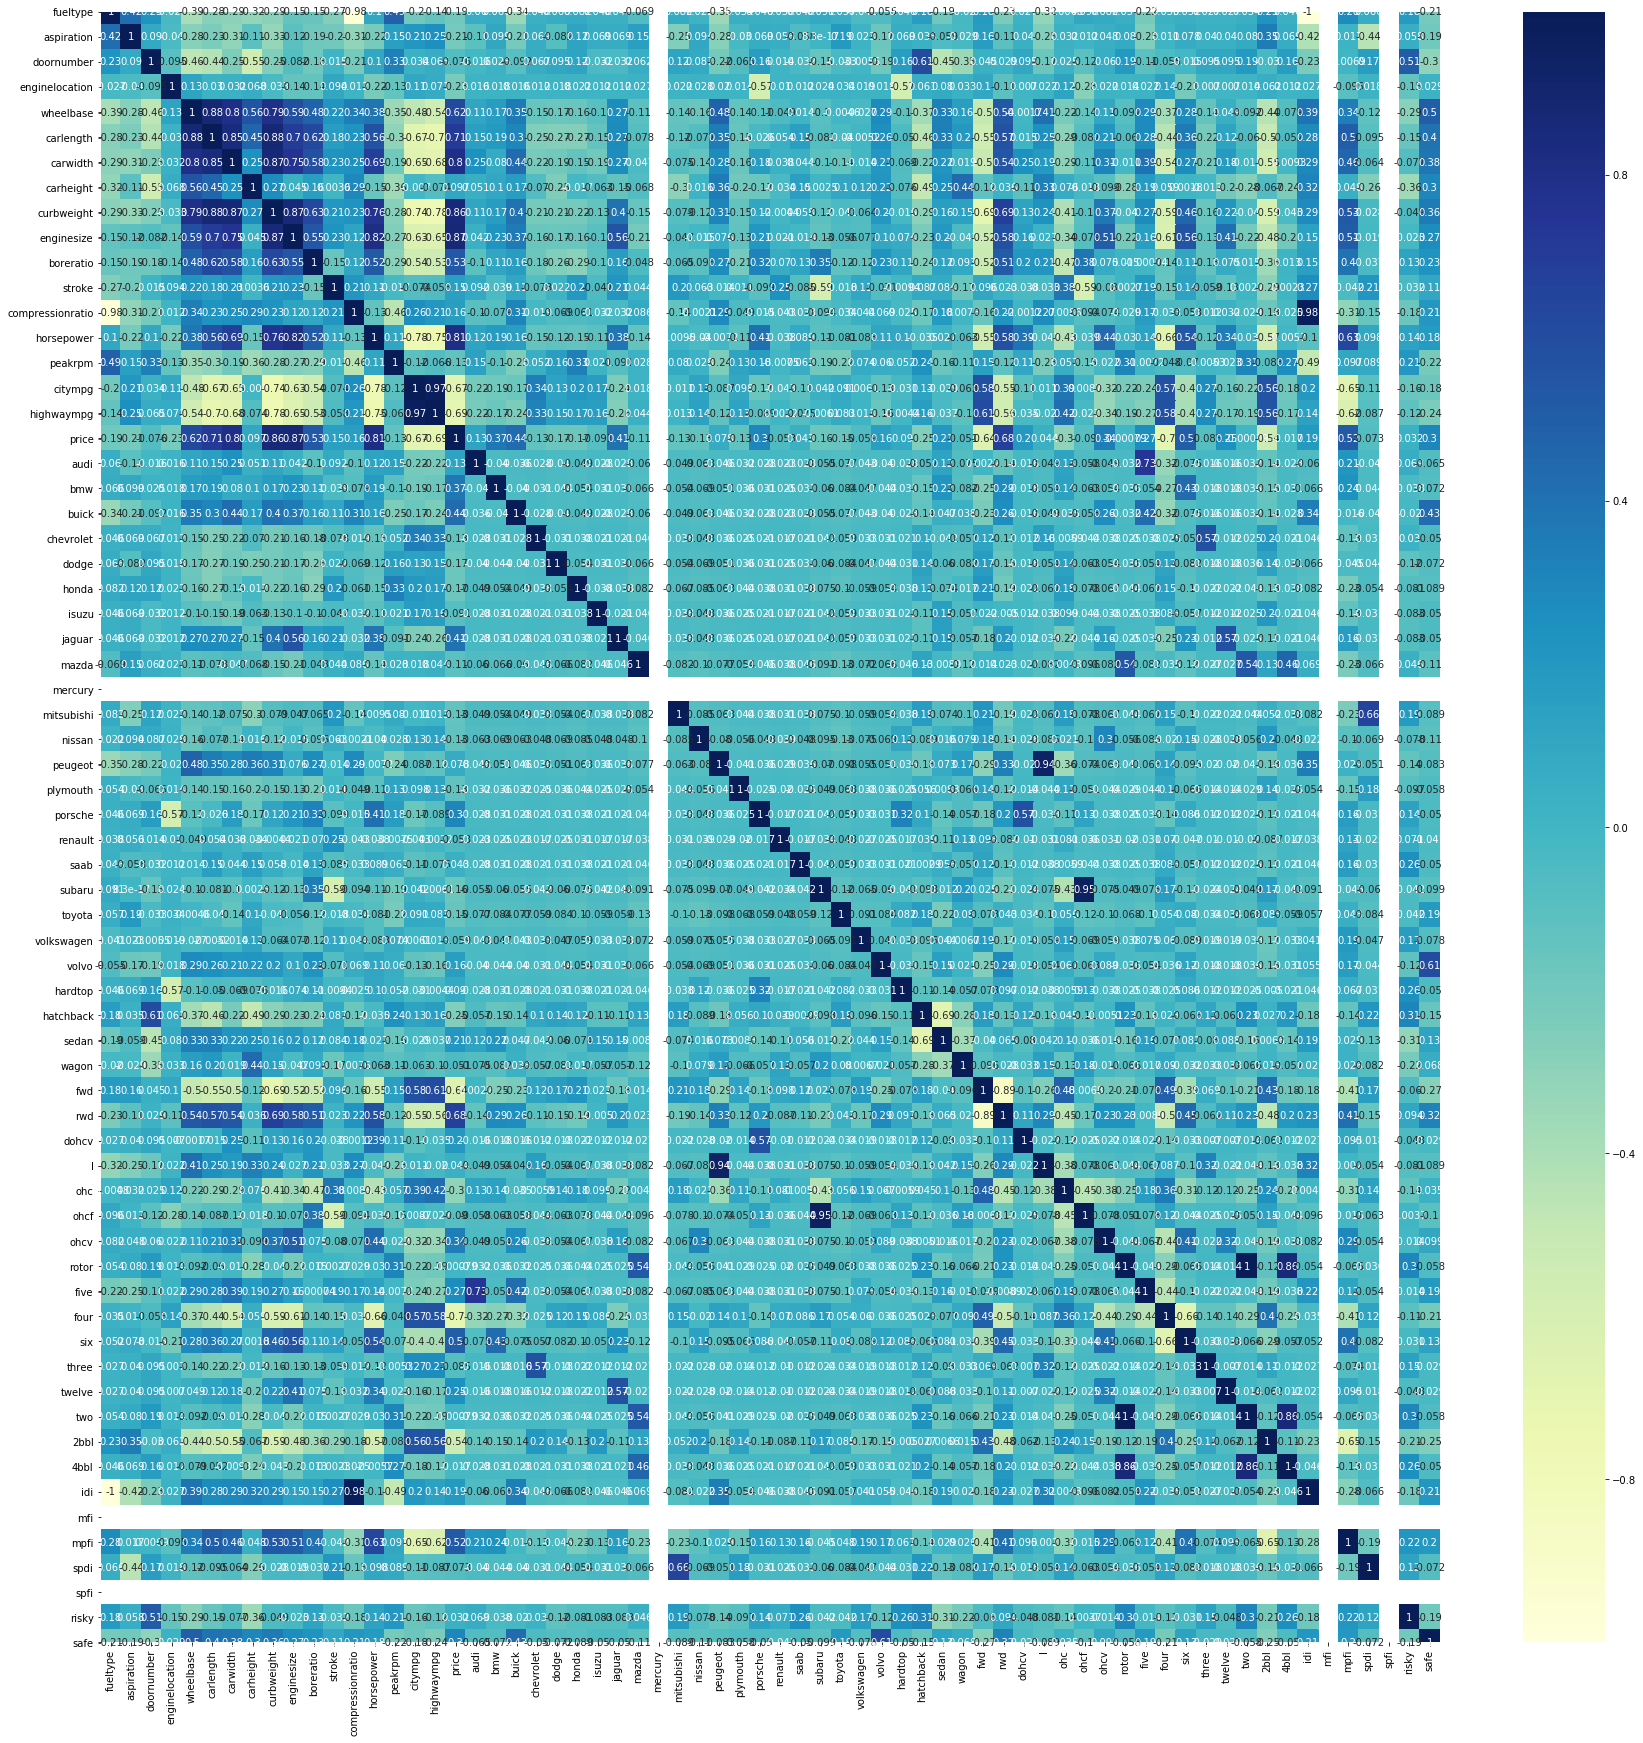

In [39]:
# heatmap
plt.figure(figsize=(30,30))
sns.heatmap(df_train.corr(),annot = True ,cmap='YlGnBu')
plt.show()


In [40]:
#X_train, y_train
y_train = df_train.pop('price')
X_train = df_train

In [41]:
y_train.head()

122    0.068818
125    0.466890
166    0.122110
1      0.314446
199    0.382131
Name: price, dtype: float64

## RFE :Recursive feature elimination

In [42]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [43]:
# Running RFE with the output number of the variable equal to 20
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 20)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [44]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('fueltype', False, 14),
 ('aspiration', False, 4),
 ('doornumber', False, 39),
 ('enginelocation', True, 1),
 ('wheelbase', False, 7),
 ('carlength', False, 11),
 ('carwidth', True, 1),
 ('carheight', False, 8),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', False, 16),
 ('horsepower', False, 5),
 ('peakrpm', False, 6),
 ('citympg', False, 27),
 ('highwaympg', False, 17),
 ('audi', False, 29),
 ('bmw', True, 1),
 ('buick', False, 35),
 ('chevrolet', False, 13),
 ('dodge', False, 10),
 ('honda', False, 12),
 ('isuzu', False, 37),
 ('jaguar', False, 18),
 ('mazda', False, 34),
 ('mercury', False, 44),
 ('mitsubishi', False, 3),
 ('nissan', False, 33),
 ('peugeot', True, 1),
 ('plymouth', False, 9),
 ('porsche', True, 1),
 ('renault', False, 41),
 ('saab', True, 1),
 ('subaru', True, 1),
 ('toyota', False, 36),
 ('volkswagen', False, 32),
 ('volvo', True, 1),
 ('hardtop', False, 21),
 ('hatchback', False, 20),
 ('

In [45]:
col = X_train.columns[rfe.support_]
col

Index(['enginelocation', 'carwidth', 'curbweight', 'enginesize', 'boreratio',
       'stroke', 'bmw', 'peugeot', 'porsche', 'saab', 'subaru', 'volvo', 'l',
       'ohcf', 'rotor', 'five', 'four', 'three', 'twelve', 'two'],
      dtype='object')

In [46]:
X_train.columns[~rfe.support_]

Index(['fueltype', 'aspiration', 'doornumber', 'wheelbase', 'carlength',
       'carheight', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'audi', 'buick', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'jaguar', 'mazda', 'mercury', 'mitsubishi', 'nissan', 'plymouth',
       'renault', 'toyota', 'volkswagen', 'hardtop', 'hatchback', 'sedan',
       'wagon', 'fwd', 'rwd', 'dohcv', 'ohc', 'ohcv', 'six', '2bbl', '4bbl',
       'idi', 'mfi', 'mpfi', 'spdi', 'spfi', 'risky', 'safe'],
      dtype='object')

In [47]:
# Train the model run the VIF 
# Remove the values which are high from stas model than from VIF

In [48]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [49]:
X_train_rfe = sm.add_constant(X_train_rfe)

In [50]:
lm = sm.OLS(y_train,X_train_rfe).fit() 

In [51]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     130.5
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           6.19e-71
Time:                        12:57:29   Log-Likelihood:                 226.54
No. Observations:                 143   AIC:                            -417.1
Df Residuals:                     125   BIC:                            -363.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0930      0.046     -2.

In [52]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
20,two,inf
8,peugeot,inf
15,rotor,inf
14,ohcf,inf
13,l,inf
11,subaru,inf
1,enginelocation,inf
18,three,inf
4,enginesize,37.13
17,four,15.81


In [53]:
X_train_new1 = X_train_rfe.drop(['const'], axis=1)

In [54]:
X_train_lm_1 = sm.add_constant(X_train_new1)

In [55]:
lm = sm.OLS(y_train,X_train_lm_1).fit() 

In [56]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     130.5
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           6.19e-71
Time:                        12:57:31   Log-Likelihood:                 226.54
No. Observations:                 143   AIC:                            -417.1
Df Residuals:                     125   BIC:                            -363.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0930      0.046     -2.

In [57]:
vif = pd.DataFrame()
X = X_train_new1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
19,two,inf
7,peugeot,inf
17,three,inf
14,rotor,inf
12,l,inf
0,enginelocation,79.10
3,enginesize,37.13
10,subaru,32.00
13,ohcf,25.13
16,four,15.81


In [58]:
X_train_new2 = X_train_new1.drop(['subaru'], axis=1)

In [59]:
X_train_lm_2 = sm.add_constant(X_train_new2)

In [60]:
lm_1 = sm.OLS(y_train,X_train_lm_2).fit() 

In [61]:
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     130.5
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           6.19e-71
Time:                        12:57:32   Log-Likelihood:                 226.54
No. Observations:                 143   AIC:                            -417.1
Df Residuals:                     125   BIC:                            -363.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0637      0.091     -0.

In [62]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
18,two,inf
7,peugeot,inf
16,three,inf
13,rotor,inf
11,l,inf
3,enginesize,98.50
0,enginelocation,62.51
2,curbweight,59.33
4,boreratio,52.55
15,four,48.15


In [63]:
X_train_new3 = X_train_new2.drop(["ohcf"], axis = 1)

In [64]:
X_train_lm_3 = sm.add_constant(X_train_new3)

In [65]:
lm_2 = sm.OLS(y_train,X_train_lm_3).fit() 

In [66]:
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     135.8
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           2.89e-71
Time:                        12:57:32   Log-Likelihood:                 224.57
No. Observations:                 143   AIC:                            -415.1
Df Residuals:                     126   BIC:                            -364.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0352      0.074      0.

In [67]:

vif = pd.DataFrame()
X = X_train_new3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
17,two,inf
7,peugeot,inf
15,three,inf
12,rotor,inf
11,l,inf
3,enginesize,96.64
0,enginelocation,59.70
2,curbweight,59.19
14,four,47.33
1,carwidth,44.80


In [68]:
X_train_new4 = X_train_new3.drop(['saab'], axis=1)

In [69]:
X_train_lm_4 = sm.add_constant(X_train_new4)

In [70]:
lm_3 = sm.OLS(y_train,X_train_lm_4).fit() 

In [71]:
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     139.8
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           3.04e-71
Time:                        12:57:33   Log-Likelihood:                 221.67
No. Observations:                 143   AIC:                            -411.3
Df Residuals:                     127   BIC:                            -363.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0458      0.075      0.

In [72]:

vif = pd.DataFrame()
X = X_train_new4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
16,two,inf
7,peugeot,inf
14,three,inf
11,rotor,inf
10,l,inf
3,enginesize,93.35
0,enginelocation,59.17
2,curbweight,56.57
13,four,47.33
1,carwidth,44.48


In [73]:
X_train_new5 = X_train_new4.drop(['volvo'], axis=1)

In [74]:
X_train_lm_5 = sm.add_constant(X_train_new5)

In [75]:
lm_4 = sm.OLS(y_train,X_train_lm_5).fit() 

In [76]:
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     141.8
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           1.03e-70
Time:                        12:57:33   Log-Likelihood:                 217.45
No. Observations:                 143   AIC:                            -404.9
Df Residuals:                     128   BIC:                            -360.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0736      0.077      0.

In [77]:

vif = pd.DataFrame()
X = X_train_new5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,peugeot,inf
9,l,inf
10,rotor,inf
13,three,inf
15,two,inf
3,enginesize,85.16
0,enginelocation,59.04
2,curbweight,54.19
12,four,46.19
1,carwidth,42.69


In [78]:
X_train_new6 = X_train_new5.drop(['peugeot'], axis=1)

In [79]:
X_train_lm_6 = sm.add_constant(X_train_new6)

In [80]:
lm_5 = sm.OLS(y_train,X_train_lm_6).fit() 

In [81]:
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     141.8
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           1.03e-70
Time:                        12:57:34   Log-Likelihood:                 217.45
No. Observations:                 143   AIC:                            -404.9
Df Residuals:                     128   BIC:                            -360.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0736      0.077      0.

In [82]:
vif = pd.DataFrame()
X = X_train_new6
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,rotor,inf
14,two,inf
3,enginesize,85.16
0,enginelocation,59.04
2,curbweight,54.19
11,four,46.19
1,carwidth,42.69
4,boreratio,37.59
5,stroke,30.79
13,twelve,2.92


In [83]:
X_train_new7 = X_train_new6.drop(['rotor'], axis=1)

In [84]:
X_train_lm_7 = sm.add_constant(X_train_new7)

In [85]:
lm_6 = sm.OLS(y_train,X_train_lm_7).fit() 

In [86]:
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     141.8
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           1.03e-70
Time:                        12:57:35   Log-Likelihood:                 217.45
No. Observations:                 143   AIC:                            -404.9
Df Residuals:                     128   BIC:                            -360.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0736      0.077      0.

In [87]:
vif = pd.DataFrame()
X = X_train_new7
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,enginesize,85.16
0,enginelocation,59.04
2,curbweight,54.19
10,four,46.19
1,carwidth,42.69
4,boreratio,37.59
5,stroke,30.79
13,two,5.09
12,twelve,2.92
9,five,2.84


In [88]:
X_train_new8 = X_train_new7.drop(['enginelocation'], axis=1)

In [89]:
X_train_lm_8 = sm.add_constant(X_train_new8)

In [90]:
lm_7 = sm.OLS(y_train,X_train_lm_8).fit() 

In [91]:
print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     129.8
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           2.21e-67
Time:                        12:57:35   Log-Likelihood:                 206.07
No. Observations:                 143   AIC:                            -384.1
Df Residuals:                     129   BIC:                            -342.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2413      0.040     -6.050      0.0

In [92]:
vif = pd.DataFrame()
X = X_train_new8
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,enginesize,76.41
1,curbweight,54.05
0,carwidth,37.76
3,boreratio,34.45
4,stroke,30.78
9,four,23.68
12,two,3.82
11,twelve,2.75
8,five,2.56
7,l,1.80


In [93]:
X_train_new9 = X_train_new8.drop(['enginesize'], axis=1)

In [94]:
X_train_lm_9 = sm.add_constant(X_train_new9)

In [95]:
lm_8 = sm.OLS(y_train,X_train_lm_9).fit() 

In [96]:
print(lm_8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     92.34
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           1.68e-57
Time:                        12:57:36   Log-Likelihood:                 178.09
No. Observations:                 143   AIC:                            -330.2
Df Residuals:                     130   BIC:                            -291.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1086      0.044     -2.480      0.0

In [97]:
vif = pd.DataFrame()
X = X_train_new9
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,curbweight,39.89
0,carwidth,37.18
2,boreratio,22.29
3,stroke,15.79
8,four,10.04
7,five,1.69
6,l,1.59
9,three,1.40
11,two,1.37
5,porsche,1.34


In [98]:
X_train_new10 = X_train_new9.drop(['five'], axis=1)

In [99]:
X_train_lm_10 = sm.add_constant(X_train_new10)

In [100]:
lm_9 = sm.OLS(y_train,X_train_lm_10).fit() 

In [101]:
print(lm_9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     101.5
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           1.65e-58
Time:                        12:57:36   Log-Likelihood:                 178.07
No. Observations:                 143   AIC:                            -332.1
Df Residuals:                     131   BIC:                            -296.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1102      0.043     -2.572      0.0

In [102]:
vif = pd.DataFrame()
X = X_train_new10
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,curbweight,37.84
0,carwidth,31.93
2,boreratio,22.28
3,stroke,15.54
7,four,8.74
6,l,1.59
8,three,1.40
10,two,1.30
5,porsche,1.29
4,bmw,1.17


In [103]:
X_train_new11 = X_train_new10.drop(['stroke'], axis=1)

In [104]:
X_train_lm_11 = sm.add_constant(X_train_new11)

In [105]:
lm_10 = sm.OLS(y_train,X_train_lm_11).fit() 

In [106]:
print(lm_10.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     112.3
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           1.65e-59
Time:                        12:57:37   Log-Likelihood:                 177.98
No. Observations:                 143   AIC:                            -334.0
Df Residuals:                     132   BIC:                            -301.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1165      0.040     -2.917      0.0

In [107]:
vif = pd.DataFrame()
X = X_train_new11
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,curbweight,31.60
0,carwidth,28.16
2,boreratio,17.06
6,four,4.23
5,l,1.34
4,porsche,1.29
7,three,1.17
3,bmw,1.16
9,two,1.16
8,twelve,1.07


In [108]:
X_train_new12 = X_train_new11.drop(['two'], axis=1)

In [109]:
 X_train_lm_12 = sm.add_constant(X_train_new12)

In [110]:
lm_11 = sm.OLS(y_train,X_train_lm_12).fit() 

In [111]:
print(lm_11.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     125.5
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           1.56e-60
Time:                        12:57:38   Log-Likelihood:                 177.88
No. Observations:                 143   AIC:                            -335.8
Df Residuals:                     133   BIC:                            -306.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1085      0.035     -3.113      0.0

In [112]:
vif = pd.DataFrame()
X = X_train_new12
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,curbweight,29.95
0,carwidth,27.33
2,boreratio,15.87
6,four,3.81
5,l,1.34
4,porsche,1.25
7,three,1.17
3,bmw,1.15
8,twelve,1.07


In [113]:
X_train_new13 = X_train_new12.drop(['boreratio'], axis=1)

In [114]:
X_train_lm_13 = sm.add_constant(X_train_new13)

In [115]:
lm_12 = sm.OLS(y_train,X_train_lm_13).fit() 

In [116]:
print(lm_12.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     141.1
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           2.10e-61
Time:                        12:57:39   Log-Likelihood:                 177.34
No. Observations:                 143   AIC:                            -336.7
Df Residuals:                     134   BIC:                            -310.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1048      0.035     -3.022      0.0

In [117]:
vif = pd.DataFrame()
X = X_train_new13
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,carwidth,27.17
1,curbweight,23.86
5,four,2.32
4,l,1.34
6,three,1.15
2,bmw,1.13
3,porsche,1.08
7,twelve,1.07


In [118]:
X_train_new14 = X_train_new13.drop(['three'], axis=1)

In [119]:
X_train_lm_14 = sm.add_constant(X_train_new14)

In [120]:
lm_13 = sm.OLS(y_train,X_train_lm_14).fit() 

In [121]:
print(lm_13.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     154.9
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           2.77e-61
Time:                        12:57:39   Log-Likelihood:                 174.29
No. Observations:                 143   AIC:                            -332.6
Df Residuals:                     135   BIC:                            -308.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0598      0.030     -2.009      0.0

In [122]:
vif = pd.DataFrame()
X = X_train_new14
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,carwidth,27.10
1,curbweight,23.71
5,four,2.32
4,l,1.17
2,bmw,1.12
3,porsche,1.08
6,twelve,1.07


In [123]:
X_train_new15 = X_train_new14.drop(['twelve'], axis=1)

In [124]:
X_train_lm_15 = sm.add_constant(X_train_new15)

In [125]:
lm_14 = sm.OLS(y_train,X_train_lm_15).fit() 

In [126]:
print(lm_14.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     172.6
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           4.78e-61
Time:                        12:57:42   Log-Likelihood:                 170.92
No. Observations:                 143   AIC:                            -327.8
Df Residuals:                     136   BIC:                            -307.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0644      0.030     -2.124      0.0

In [127]:
vif = pd.DataFrame()
X = X_train_new15
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,carwidth,27.02
1,curbweight,23.34
5,four,2.29
4,l,1.16
2,bmw,1.12
3,porsche,1.07


In [128]:
X_train_new16 = X_train_new15.drop(['carwidth'], axis=1)

In [129]:
X_train_lm_16 = sm.add_constant(X_train_new16)

In [130]:
lm_15 = sm.OLS(y_train,X_train_lm_16).fit() 

In [131]:
print(lm_15.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     195.8
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           1.46e-60
Time:                        12:57:42   Log-Likelihood:                 166.91
No. Observations:                 143   AIC:                            -321.8
Df Residuals:                     137   BIC:                            -304.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0296      0.028     -1.044      0.2

In [132]:
vif = pd.DataFrame()
X = X_train_new16
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,curbweight,2.00
4,four,1.71
3,l,1.14
1,bmw,1.11
2,porsche,1.05


In [133]:
# X_train_new17 = X_train_new16.drop(['l'], axis=1)

In [134]:
# X_train_lm_17 = sm.add_constant(X_train_new17)

In [135]:
# lm_16 = sm.OLS(y_train,X_train_lm_17).fit() 

In [136]:
# print(lm_16.summary())

In [137]:
# vif = pd.DataFrame()
# X = X_train_new17
# vif['Features'] = X.columns
# vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
# vif['VIF'] = round(vif['VIF'], 2)
# vif = vif.sort_values(by = "VIF", ascending = False)
# vif

## Residual Analysis of the train data

In [138]:
y_train_price = lm_15.predict(X_train_lm_16)
y_train_price

122    0.087081
125    0.553062
166    0.118356
1      0.189515
199    0.364255
         ...   
87     0.147910
103    0.421464
67     0.552018
24     0.022809
8      0.428925
Length: 143, dtype: float64

Text(0.5, 0, 'Errors')

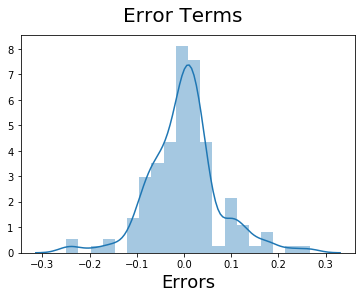

In [139]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

#### 1)Error terms are normally distributed and 2)Error terms are centered around zero

In [140]:
num_vars = num_vars = ['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [141]:
y_test = df_test.pop('price')
X_test = df_test

In [142]:
X_train_new16.columns

Index(['curbweight', 'bmw', 'porsche', 'l', 'four'], dtype='object')

In [143]:
X_test_new = X_test[X_train_new16.columns]
X_test_new

,curbweight,bmw,porsche,l,four
160,0.235066,0,0,0,1
186,0.305275,0,0,0,1
59,0.347944,0,0,0,1
165,0.301396,0,0,0,1
140,0.291699,0,0,0,1
...,...,...,...,...,...
28,0.406129,0,0,0,1
29,0.513189,0,0,0,1
182,0.299845,0,0,0,1
40,0.342901,0,0,0,1


In [144]:
X_test_new = sm.add_constant(X_test_new)

In [145]:
# Making predictions
y_pred1 = lm_15.predict(X_test_new)

## Model Evaluation

Text(0, 0.5, 'y_pred')

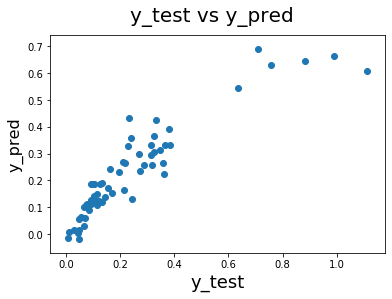

In [146]:
fig = plt.figure()
plt.scatter(y_test,y_pred1)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16) 

In [147]:
r2 = r2_score(y_true = y_test,y_pred=y_pred1)
r2

0.8085839697335956

In [148]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(y_test, y_pred1))
print('Model RMSE:',rmse)

Model RMSE: 0.10114765912732697


#### RMSE is low and the r2 is 0.80

#### Tried with another model removing the variables and R2 and adj R2 became very low almost 0.35. So finalised with the above model

#### The model takes curb weight and high end cars BMW, Porsche with cylinder type four and engine type l. Geely automobile can look at these predictor variables to set the target price to enter the USA market.